In [1]:
import os
os.chdir('..')

In [2]:
from src.data.Dataset import Dataset as DS
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Dataset generator
input_dim   = 30*4
pred_dim    = 30*2
shift       = pred_dim
data        = DS(input_dim, pred_dim, shift, skip=1, hop=0.1, normalizer=1, classification=True)
data2       = DS(input_dim, pred_dim, 2*shift, skip=1, hop=0.1, normalizer=1, classification=True)

In [53]:
data2.Train.element_spec

(TensorSpec(shape=(None, 120, 1), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float64, name=None))

In [5]:
# Loss functions
# Classification loss
Bin_cross_entropy = tf.keras.losses.BinaryCrossentropy()

# Metrics
# Classification metrics
Bin_accuracy = tf.keras.metrics.BinaryAccuracy()

In [6]:
INPUT_DIM = data.xshape
OUTPUT_DIM = data.yshape

In [7]:
classification_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(INPUT_DIM,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_DIM, activation='sigmoid')
])

In [54]:
classification_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(INPUT_DIM,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_DIM, activation='sigmoid')
])

In [8]:
classification_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7744      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,017
Trainable params: 14,017
Non-trainable params: 0
_________________________________________________________________


In [9]:
MAX_EPOCHS = 20

def lr_optimizer(model, window, patience=2):

  lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
      lambda epoch: 1e-5 * 10**(epoch / 4))

  model.compile(loss=Bin_cross_entropy,
                optimizer=tf.optimizers.Adam(),
                metrics=[Bin_accuracy])

  history = model.fit(window.Train, epochs=MAX_EPOCHS,
                      validation_data=window.Val,
                      callbacks=[lr_scheduler])
  return history

In [10]:
history = lr_optimizer(classification_model, data)

Epoch 1/20
2738/2738 [==============================] - 12s 4ms/step - loss: 1.0235 - binary_accuracy: 0.7933 - val_loss: 0.6415 - val_binary_accuracy: 0.9155 - lr: 1.0000e-05
Epoch 2/20
2738/2738 [==============================] - 12s 4ms/step - loss: 0.4833 - binary_accuracy: 0.8596 - val_loss: 0.6721 - val_binary_accuracy: 0.9157 - lr: 1.7783e-05
Epoch 3/20
2738/2738 [==============================] - 12s 4ms/step - loss: 0.3110 - binary_accuracy: 0.8897 - val_loss: 0.6865 - val_binary_accuracy: 0.9157 - lr: 3.1623e-05
Epoch 4/20
2738/2738 [==============================] - 13s 5ms/step - loss: 0.2385 - binary_accuracy: 0.9035 - val_loss: 0.5933 - val_binary_accuracy: 0.9157 - lr: 5.6234e-05
Epoch 5/20
2738/2738 [==============================] - 12s 4ms/step - loss: 0.2052 - binary_accuracy: 0.9108 - val_loss: 0.5495 - val_binary_accuracy: 0.9157 - lr: 1.0000e-04
Epoch 6/20
2738/2738 [==============================] - 12s 4ms/step - loss: 0.1872 - binary_accuracy: 0.9156 - val_loss

(1e-05, 0.001, 0.0, 5.0)

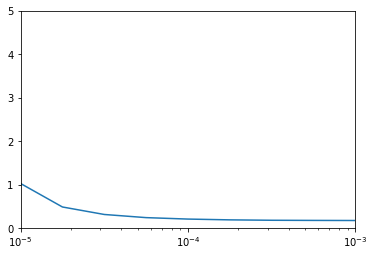

In [12]:
lrs = 1e-5 * (10 ** (np.arange(MAX_EPOCHS) / 4))
plt.semilogx(lrs, history.history['loss'])
plt.axis([1e-5, 1e-3, 0, 5])

In [13]:
classification_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(INPUT_DIM,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_DIM, activation='sigmoid')
])

In [14]:
MAX_EPOCHS_TRAINING = 30

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
      lambda epoch: 1e-5 * 10**(epoch / 4))

  model.compile(loss=Bin_cross_entropy,
                optimizer=tf.optimizers.Adam(learning_rate=1e-5),
                metrics=[Bin_accuracy])

  history = model.fit(window.Train, epochs=MAX_EPOCHS_TRAINING,
                      validation_data=window.Val,
                      callbacks=[early_stopping])
  return history

In [55]:
history_training2 = compile_and_fit(classification_model2, data2)

Epoch 1/30
2738/2738 [==============================] - 11s 4ms/step - loss: 0.7238 - binary_accuracy: 0.8202 - val_loss: 0.6107 - val_binary_accuracy: 0.9154
Epoch 2/30
2738/2738 [==============================] - 11s 4ms/step - loss: 0.5924 - binary_accuracy: 0.8497 - val_loss: 0.5443 - val_binary_accuracy: 0.9159
Epoch 3/30
2738/2738 [==============================] - 11s 4ms/step - loss: 0.5028 - binary_accuracy: 0.8595 - val_loss: 0.4740 - val_binary_accuracy: 0.9159
Epoch 4/30
2738/2738 [==============================] - 11s 4ms/step - loss: 0.4282 - binary_accuracy: 0.8628 - val_loss: 0.4105 - val_binary_accuracy: 0.9157
Epoch 5/30
2738/2738 [==============================] - 11s 4ms/step - loss: 0.3707 - binary_accuracy: 0.8648 - val_loss: 0.3578 - val_binary_accuracy: 0.9155
Epoch 6/30
2738/2738 [==============================] - 11s 4ms/step - loss: 0.3309 - binary_accuracy: 0.8675 - val_loss: 0.3195 - val_binary_accuracy: 0.9154
Epoch 7/30
2738/2738 [========================

In [15]:
history_training = compile_and_fit(classification_model, data)

Epoch 1/30
2738/2738 [==============================] - 11s 4ms/step - loss: 0.6872 - binary_accuracy: 0.8309 - val_loss: 0.6342 - val_binary_accuracy: 0.9169
Epoch 2/30
2738/2738 [==============================] - 12s 4ms/step - loss: 0.5113 - binary_accuracy: 0.8623 - val_loss: 0.5571 - val_binary_accuracy: 0.9167
Epoch 3/30
2738/2738 [==============================] - 12s 4ms/step - loss: 0.4021 - binary_accuracy: 0.8812 - val_loss: 0.4673 - val_binary_accuracy: 0.9167
Epoch 4/30
2738/2738 [==============================] - 12s 4ms/step - loss: 0.3291 - binary_accuracy: 0.8898 - val_loss: 0.3909 - val_binary_accuracy: 0.9170
Epoch 5/30
2738/2738 [==============================] - 12s 4ms/step - loss: 0.2846 - binary_accuracy: 0.8954 - val_loss: 0.3341 - val_binary_accuracy: 0.9182
Epoch 6/30
2738/2738 [==============================] - 12s 4ms/step - loss: 0.2572 - binary_accuracy: 0.8989 - val_loss: 0.2936 - val_binary_accuracy: 0.9200
Epoch 7/30
2738/2738 [========================

In [16]:
val_performance = classification_model.evaluate(data.Val)
test_performance = classification_model.evaluate(data.Test)

392/392 [==============================] - 2s 4ms/step - loss: 0.1965 - binary_accuracy: 0.9126


In [57]:
y_pred = classification_model2.predict(data2.Test)

In [58]:
labels_list = []
for _, labels in data2.Test:
    for l in labels:
        labels_list.append(l[0])
labels = np.array(labels_list)

In [59]:
labels.shape

(6258, 1)

In [60]:
pred = []
thres = 0.5
for p in y_pred:
    pred.append(1 if p[0] > thres else 0)

pred = np.array(pred)

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

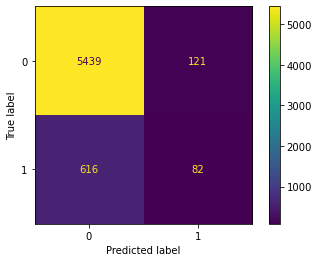

In [61]:
cm = confusion_matrix(labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp = disp.plot(include_values=True, cmap='viridis')
plt.show()

In [62]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP/ (TP + FP)
recall = TP/ (TP + FN)

In [63]:
print('Accuracy  = ', accuracy)
print('Precision = ', precision)
print('Recall    = ', recall)

Accuracy  =  0.882230744646852
Precision =  0.4039408866995074
Recall    =  0.1174785100286533


In [17]:
print('Validation loss: {:.2f}'.format(val_performance[0]))
print('Validation accuracy: {:.2f}'.format(val_performance[1]))
print('Test loss: {:.2f}'.format(test_performance[0]))
print('Test accuracy: {:.2f}'.format(test_performance[1]))

Validation loss: 0.15
Validation accuracy: 0.94
Test loss: 0.20
Test accuracy: 0.91


In [18]:
classification_model.save('models/classification_model')

INFO:tensorflow:Assets written to: models/classification_model\assets


In [56]:
classification_model2.save('models/classification_model2')

INFO:tensorflow:Assets written to: models/classification_model2\assets
